# Sharing Project Approaches (SPA) group
> Thomas Huet, University of Oxford, project EAMENA <br>
> <sup> Thu 22 Feb, 2024 </sup>

In [1]:
from IPython.display import display, HTML, IFrame
import requests, json

## The ACHP GitHub organisation

<div>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-achp-header.png" width = "600">

<sup><img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" vertical-align="middle;" width="30"> <https://github.com/achp-project></sup>

</center>
</div>

talk: ["Shared heritage"](https://colab.research.google.com/github/achp-project/cultural-heritage/blob/main/presentation/bhdc/rm_compar.ipynb) *at the* Big Historical Data conference - Environments of big cultural heritage data integration <sup> 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/</sup>





## Privilegied IT



### JSON <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-format-json.png' width = "30px">

JSON is the most popular format of the web. GeoJSON is the format of the coordinates of the Map Search and Report and Arches API

| Description |  |
|----------|----------|
| Edit<br>Coordinates | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-mbr.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-mbr.png" width="850px"> </a> |
| Export | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-export.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-export.png" width="850px"> </a> |
| Arches<br>API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png" width="850px"> </a> |
| Arches API<br>to<br>Zenodo API | <a href="https://private-user-images.githubusercontent.com/41572010/304020545-8943e20f-9c22-4f94-87a3-c2df8c59d421.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MDgzNTkyNDUsIm5iZiI6MTcwODM1ODk0NSwicGF0aCI6Ii80MTU3MjAxMC8zMDQwMjA1NDUtODk0M2UyMGYtOWMyMi00Zjk0LTg3YTMtYzJkZjhjNTlkNDIxLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNDAyMTklMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjQwMjE5VDE2MDkwNVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWIzZWUyM2E3ZTMyYjk1NzhiNWNlYjdmOThiNDYxYjkyMzFlMzBkY2QzNTBjYTlmNGU3ZWMyZDY5YzIwOTAwOTQmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0JmFjdG9yX2lkPTAma2V5X2lkPTAmcmVwb19pZD0wIn0.z3pHTy1JnvvnLXU_muZKy6a1_L2e4oirySP5IPsJabI"> <img src="https://private-user-images.githubusercontent.com/41572010/304020545-8943e20f-9c22-4f94-87a3-c2df8c59d421.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MDgzNTkyNDUsIm5iZiI6MTcwODM1ODk0NSwicGF0aCI6Ii80MTU3MjAxMC8zMDQwMjA1NDUtODk0M2UyMGYtOWMyMi00Zjk0LTg3YTMtYzJkZjhjNTlkNDIxLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNDAyMTklMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjQwMjE5VDE2MDkwNVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWIzZWUyM2E3ZTMyYjk1NzhiNWNlYjdmOThiNDYxYjkyMzFlMzBkY2QzNTBjYTlmNGU3ZWMyZDY5YzIwOTAwOTQmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0JmFjdG9yX2lkPTAma2V5X2lkPTAmcmVwb19pZD0wIn0.z3pHTy1JnvvnLXU_muZKy6a1_L2e4oirySP5IPsJabI" width="850px"> </a> |
| GeoJSON<br>displayed<br>on GitHub | <a href="https://github.com/eamena-project/eamena-arches-dev/blob/main/data/geojson/caravanserail.geojson"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-github.png' width = "850px"> </a> |




### GitHub <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-github-2.png' width = "30px">

The most popular source code management web-platform to share code (the future of Arches) and data. GitHub allows to create releases and Zenodo realease to get a DOI.

| Description |  |
|----------|----------|
| Zenodo<br>release<br><img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/lod-doi.png' width = "30px"> | <a href="https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-zenodo-github-release.png"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-zenodo-github-release.png' width = "850px"> </a> |
| Zenodo<br>community | <a href="https://zenodo.org/communities/eamena"><img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-communities-eamena.png' width = "850px"></a> |
| Zenodo<br>OAI-PMH API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-metadata-eamena.png"><img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-metadata-eamena.png' width = "850px"></a>  |



### Python <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-1.png' width = "30px">

The most populat programming language in the world, and the main language in Arches (ex: plugins). Python offers numerous librairies, among with:

| Python libraries |  Description|
|----------|----------|
| `json` | local <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-format-json.png' width = "50px"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-js-format-geojson.png' width = "50px"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/lod-format-jsonld.png' width = "50px">|
| `requests` | GitHub<br>hosted <a href="https://github.com/eamena-project/eamena-arches-dev/blob/main/data/geojson/caravanserail.geojson"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-github.png' width = "800px"> </a> <br> REST API <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png" width="800px"> </a> |
| `rdflib` | <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-rdflib.png' width = "50px"> </a> |


* Sharing

| IDE |  Description|
|----------|----------|
| Jupyter | <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-jupyter.png' width = "50px"> |
| Colab | <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-google-colab.png' width = "60px"> |

* Processing

| Python libraries |  Description|
|----------|----------|
| `ee` <br> Python API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/app-prg-python-ee-hp-satellite.png"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/app-prg-python-ee-hp-satellite.png' width = "900px"> </a>|


### R <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-r.png' width = "30px">

The most popular programming language in Archaeology.

| Description |  |
|----------|----------|
| Statistics | <img src='https://raw.githubusercontent.com/eamena-project/eamenar/master/results/overall_condition_pie.png' width = "600px"> |
| Interactivity <br> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-r-pkg-shiny.png' width = "40px"> | <img src='https://raw.githubusercontent.com/eamena-project/eamenar/master/results/edtf_plotly_category_ym.png' width = "800px"> |





In [2]:
IFrame('https://zackbatist.info/openarchaeo-collaboration/#tbl-platforms', width="100%", height=400)

### JavaScript <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js.png' width = "30px">

With <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-geo-leaflet.png' width = "100px"> and <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-plotly.png' width = "100px">


## Reference data integration in EAMENA-MaREA

### EAMENA graphs

In [3]:
# @title
json_url = 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json'
response = requests.get(json_url)
data = response.json()
json_str = json.dumps(data, indent=4)
scrollable_box = f"""
<div style="border: 1px solid black; overflow-y: scroll; height: 300px; padding: 10px; background-color: #f9f9f9;">
<pre>{json_str}</pre>
</div>
"""
display(HTML(scrollable_box))

### Field description

In [4]:
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/mds/fields-description.html', width="100%", height=500)

### Field groups and values


In [71]:
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/mds/field-to-tsv.html', width="30%", height=400)

### Field minimun standard

In [5]:
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/mds/mds-reference.html', width="100%", height=600)

Workflow

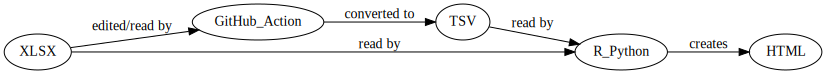

In [8]:
# @title
from graphviz import Digraph

dot = Digraph()
dot.attr(rankdir='LR')
# nodes
dot.node('XLSX', 'XLSX', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template.xlsx")
dot.node('GitHub_Action', 'GitHub_Action', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/.github/workflows/bu-to-tsv.yml")
dot.node('TSV', 'TSV', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv")
dot.node('R_Python', 'R_Python', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/convert_xlsx_to_tsv.py")
dot.node('HTML', 'HTML', URL="https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/mds/field-to-tsv.html")
# links
dot.edge('XLSX', 'GitHub_Action', label=' edited/read by ')
dot.edge('GitHub_Action', 'TSV', label=' converted to ')
# dot.edge('GitHub_Action', 'R_Python', label=' triggers ')
dot.edge('TSV', 'R_Python', label=' read by ')
dot.edge('XLSX', 'R_Python', label=' read by ')
dot.edge('R_Python', 'HTML', label=' creates ')
dot.render('workflow_diagram', format='png', view=True)
dot

Cultural history

In [9]:
IFrame('https://n2t.net/ark:/99152/p0m64td', width="100%", height=400)

## Arches-based Resource Models modeling and semantization

Load GitHub repository, requirements and libraries

In [1]:
# @title
# download ACHP graph_mixer
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
# !pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
!pip install pyvis rdflib
# !pip install
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
import graph_rdf as grdf
# download EAMENA erms
%cd /content/
!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
%cd /content/eamena-functions/mds
import mds

# librairies
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from pyvis import network as net
import folium
import json
from google.colab import files

Cloning into 'cultural-heritage'...
remote: Enumerating objects: 3258, done.
remote: Counting objects: 100% (526/526), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 3258 (delta 345), reused 479 (delta 310), pack-reused 2732
Receiving objects: 100% (3258/3258), 36.15 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (2379/2379), done.
/content/cultural-heritage/graph-parser
/content
rm: cannot remove 'eamena-functions': No such file or directory
Cloning into 'eamena-functions'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 275 (delta 33), reused 52 (delta 21), pack-reused 210
Receiving objects: 100% (275/275), 59.00 KiB | 3.93 MiB/s, done.
Resolving deltas: 100% (156/156), done.
/content/eamena-functions/mds


### Select Resource Model (RM)

List of available RMs

In [2]:
# @title
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files = gm.rm_list()
remote_source_files

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory


{'CAAL': 'https://raw.githubusercontent.com/achp-project/prj-caal/main/resource_models/arches/CAAL-SitesAndMonuments.json',
 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json',
 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json',
 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json',
 'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json',
 'MAPHSA': 'https://raw.githubusercontent.com/achp-project/prj-maphsa/heritage_branch/resource_model/MAPHSA%20Heritage%20Location%20Resource%20Model%20v0.44.json',
 'MAPSS': 'https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json'}

Select the EAMENA HP Resource Model (RM) within the listed RMs

In [3]:
# @title
rm_project= 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files = gm.rm_list()
infile = remote_source_files[rm_project]
gm.rm_selected_one('EAMENA', remote_source_files)

/content/cultural-heritage/graph-parser
EAMENA_Heritage%20Place.json has been loaded into the folder inputResourceModels/


Select EAMENA RM (key: `EAMENA`) to plot it (nb, other keys: `MAPSS`, `MAHS`, etc.)

### Read

Creates the Entity-relationships diagram (ERD) of EAMENA Heritage Places (HP) and color nodes according to the [mds-template-readonly.tsv](https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv) file (see: [GitHub documentation](https://github.com/eamena-project/eamena-arches-dev/tree/main/dbs/database.eamena/data/reference_data#templates))

Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

Show the RM

In [4]:
# @title
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)
## Warnings in EAMENA
## There are 2 "Disturbance Event Timespan" subgraphs

## Uncomment to export
# files.download(filename)


### RDF

Show the turtle serialization

In [6]:
print(grdf.to_rdf('https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json', outformat = 'json-ld'))

[
  {
    "@id": "http://prj-eamena-marea#34cfea86-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/title": [
      {
        "@value": "Dimension Type"
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#subClassOf": [
      {
        "@id": "http://www.cidoc-crm.org/cidoc-crm/E55_Type"
      }
    ]
  },
  {
    "@id": "http://prj-eamena-marea#34cfea4e-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/title": [
      {
        "@value": "Material Type"
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#subClassOf": [
      {
        "@id": "http://www.cidoc-crm.org/cidoc-crm/E57_Material"
      }
    ]
  },
  {
    "@id": "http://prj-eamena-marea#34cfea1c-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/ti